1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- MaxHR: Maximum heart rate achieved. Has data type $int64$, numeric value from 60 to 202.
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- ca: number of major vessels (0-3) colored by flourosopy - given
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

## Load Dataset

In [1]:
# import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
import pandas as pd
PATH = "/content/heart.csv" # Path to your file

df = pd.read_csv(PATH)
#ToDo: Show histogram of dataframe

## Data Analysis

1. Explore the data

In [3]:
# Data analysis
# Todo: analyze your data here

In [4]:
print(df.head(10)) # View the first 10 rows

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   46    1   0       120   249    0        0      144      0      0.8      2   
1   71    0   1       160   302    0        1      162      0      0.4      2   
2   71    0   1       160   303    0        1      163      0      0.4      2   
3   71    0   1       160   304    0        1      164      0      0.4      2   
4   71    0   1       160   305    0        1      165      0      0.4      2   
5   71    0   1       160   306    0        1      166      0      0.4      2   
6   71    0   1       160   301    0        1      161      0      0.4      2   
7   71    0   1       160   300    0        1      160      0      0.4      2   
8   71    0   1       160   299    0        1      159      0      0.4      2   
9   71    0   1       160   298    0        1      158      0      0.4      2   

   ca  thal  target  
0   0     3       0  
1   2     2       1  
2   2     2       1  
3   2     2       1 

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB
None


In [6]:
df.describe() #View the statistical summary of continuous variables

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,54.007901,0.683973,1.005643,132.117381,247.497743,0.168172,0.495485,149.492099,0.310384,1.083296,1.424379,0.714447,2.278781,0.564334
std,9.126292,0.465186,1.024542,16.807511,47.209995,0.374230,0.526669,23.921327,0.462912,1.147935,0.556861,1.028825,0.572576,0.496124
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,245.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,206.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
print(df.isnull().sum()) #Check for missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

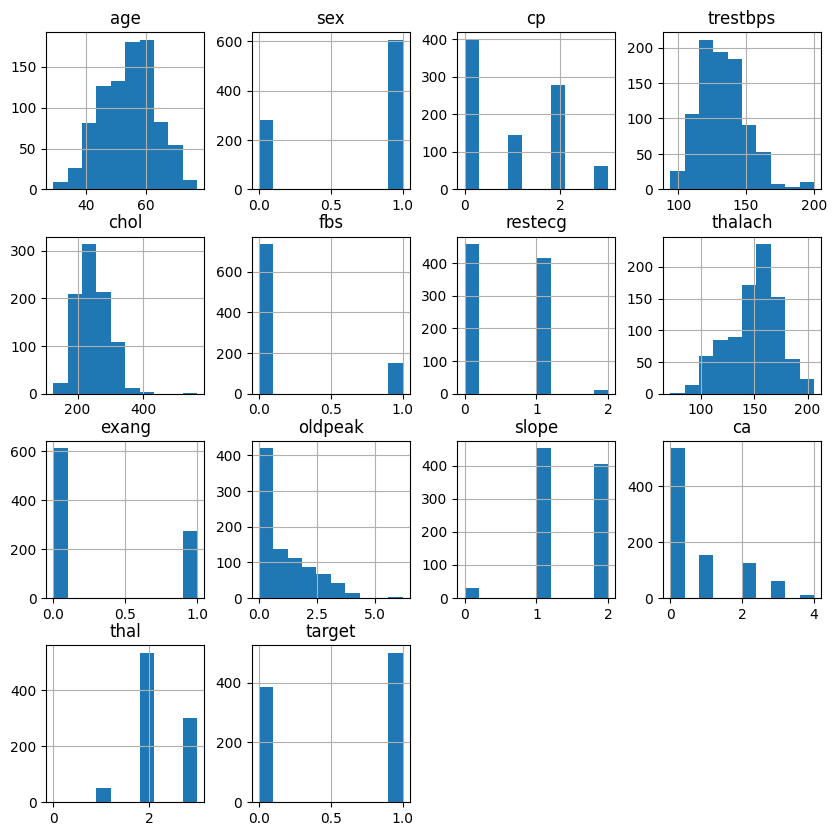

In [8]:
column_names = list(df.columns)
df.hist(column = column_names, figsize = (10,10))

<Axes: >

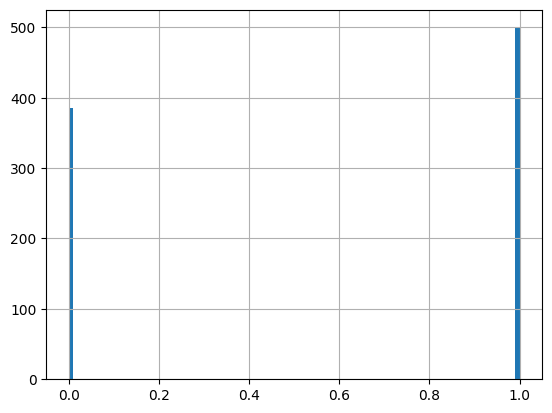

In [9]:
# Thống kê cột 'target'
df["target"].hist(bins = 100)

<Axes: >

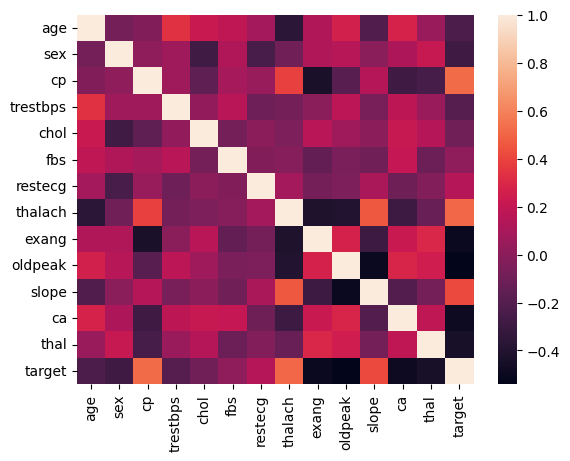

In [10]:
sns.heatmap(df.corr())

## Preprocessing

In [11]:
def preprocessing_data(df):
   
   return df

## Feature Engineering

<Axes: >

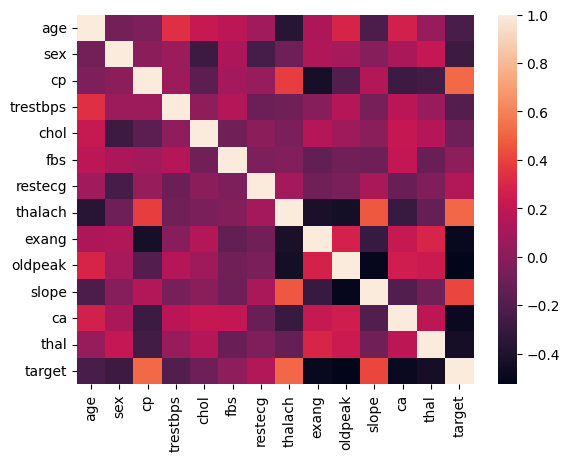

In [12]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    pt = PowerTransformer(standardize=False)
    continuous_cols = df.select_dtypes(include=['float64']).columns
    df[continuous_cols] = pt.fit_transform(df[continuous_cols].values)
    return df

df = apply_feature_engineering(df.copy())
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [13]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """

    X = df.drop('target', axis=1, inplace=False)# Todo: Select features
    y = df['target']
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [14]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 945
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [15]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

def build_model(X, y, param_grid=None):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    # Find best penalty and solver for logistic regression
    model = make_pipeline(StandardScaler(), LogisticRegression())
    # Todo: fit your model with X, y
    if param_grid is not None:
        param_grid = {"logisticregression__"+k: v for k, v in param_grid.items()}
        model = GridSearchCV(model, param_grid, cv=5)
    model.fit(X, y)

    return model

def calculate_performance(y_true, y_pred):
    """
    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    confusion_mat = confusion_matrix(y_true , y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true , y_pred))
    print("Recall: ", recall_score(y_true , y_pred))
    print("F1: ", f1_score(y_true, y_pred))
    # Todo: Only choose one of them as your score for the question 7
    main_score = recall_score(y_true, y_pred)
    return main_score

param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],\
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

model = build_model(trainX, trainY, param_grid)

# Compare on training dataset
train_pred = model.predict(trainX)
print("Training Set Performance:")
print(classification_report(trainY, train_pred))

# Compare on test dataset
test_pred = model.predict(testX)
print("Test Set Performance:")
print(classification_report(testY, test_pred))

# Print main metric score
print(f'Main metric Recall score: {calculate_performance(testY, test_pred)}')

Training Set Performance:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       280
           1       0.93      0.96      0.94       340

    accuracy                           0.94       620
   macro avg       0.94      0.93      0.94       620
weighted avg       0.94      0.94      0.94       620

Test Set Performance:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       106
           1       0.95      0.97      0.96       160

    accuracy                           0.95       266
   macro avg       0.95      0.95      0.95       266
weighted avg       0.95      0.95      0.95       266

Accuracy: 0.9511278195488722
Precision:  0.950920245398773
Recall:  0.96875
F1:  0.9597523219814241
Main metric Recall score: 0.96875


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File

In [16]:
# Conclusion
print("It can be seen that the main metric used to evaluate the model's performance is recall.") 
print("The use of recall is appropriate in cases where Positive cases are very important and False Negative (predicting Negative but actually Positive) can have serious consequences. ")
print("In the case of heart disease classification, False Negative can lead to patients being missed and not diagnosed and treated in time, so recall is an important metric to evaluate the performance of the model.")

It can be seen that the main metric used to evaluate the model's performance is recall.
The use of recall is appropriate in cases where Positive cases are very important and False Negative (predicting Negative but actually Positive) can have serious consequences. 
In the case of heart disease classification, False Negative can lead to patients being missed and not diagnosed and treated in time, so recall is an important metric to evaluate the performance of the model.
